In [3]:
#!/usr/bin/env python
# coding: utf-8

# This script is used to compare ensemble outputs with NLDAS data
import os
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import xarray as xr
import datetime

def read_ens(out_forc_name_base, metric, start_yr, end_yr):
    
    for yr in range(start_yr, end_yr+1): 
        
        file = os.path.join(out_forc_name_base + '.' + str(yr) + '.'+metric+'.nc')
        f=xr.open_dataset(file)
        
        if yr == start_yr:
            pcp = f['pcp'].values[:] # (time, y, x). unit: mm/day
            t_mean = f['t_mean'].values[:] # (time, y, x). unit: degC
            t_min = f['t_min'].values[:] 
            t_max = f['t_max'].values[:]
            t_range = f['t_range'].values[:]
            time = f['time'].values[:]
        else:
            pcp = np.concatenate((pcp, f['pcp'].values[:]), axis = 0)
            t_mean = np.concatenate((t_mean, f['t_mean'].values[:]), axis = 0)
            t_min = np.concatenate((t_min, f['t_min'].values[:]), axis = 0)
            t_max = np.concatenate((t_max, f['t_max'].values[:]), axis = 0)
            t_range = np.concatenate((t_range, f['t_range'].values[:]), axis = 0)
            time = np.concatenate((time, f['time'].values[:]), axis = 0)
    
    time_obj = pd.to_datetime(time)
    
    return time_obj, pcp, t_mean, t_min, t_max, t_range
        

#======================================================================================================
# main script
root_dir = '/glade/u/home/hongli/scratch/2020_04_21nldas_gmet'   
nldas_dir = os.path.join(root_dir,'data/nldas_daily_utc_convert')
start_yr = 2016
end_yr = 2016

gridinfo_file = os.path.join(root_dir,'data/nldas_topo/conus_ens_grid_eighth.nc')

result_dir = os.path.join(root_dir,'test_uniform_perturb')
test_folders = [d for d in os.listdir(result_dir)]
test_folders = sorted(test_folders)
scenarios_ids = range(0,9) 
intervals =  range(10,1,-1) 
scenario_num = len(scenarios_ids)

subforlder = 'gmet_ens_summary' #'gmet_ens_bc_summary' #'gmet_ens_summary'
file_basename = 'ens_forc'

ens_num = 100
time_format = '%Y-%m-%d'

dpi_value = 150
plot_date_start = '2016-01-01'
plot_date_end = '2016-12-31'
plot_date_start_obj = datetime.datetime.strptime(plot_date_start, time_format)
plot_date_end_obj = datetime.datetime.strptime(plot_date_end, time_format)

output_dir=os.path.join(root_dir, 'scripts/step17_plot_sample_mean_scatter')
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
output_filename_base = 'step17_plot_sample_mean_scatter_'
    
# #======================================================================================================
# print('Read gridinfo mask')
# # get xy mask from gridinfo.nc
# f_gridinfo = xr.open_dataset(gridinfo_file)
# mask_xy = f_gridinfo['mask'].values[:] # (y, x). 1 is valid. 0 is invalid.
# #data_mask = f_gridinfo['data_mask'].values[:] # (y, x). 1 is valid. 0 is invalid.

# #======================================================================================================
# # read historical nldas data
# print('Read nldas data')
# for yr in range(start_yr, end_yr+1):
    
#     nldas_file = 'NLDAS_'+str(yr)+'.nc'
#     nldas_path = os.path.join(nldas_dir, nldas_file)
    
#     f_nldas = xr.open_dataset(nldas_path)
#     if yr == start_yr:
#         pcp = f_nldas['pcp'].values[:] # (time, y, x). unit: mm/day
#         t_mean = f_nldas['t_mean'].values[:] # (time, y, x). unit: degC
#         t_min = f_nldas['t_min'].values[:] 
#         t_max = f_nldas['t_max'].values[:]
#         t_range = f_nldas['t_range'].values[:]
#         time = f_nldas['time'].values[:]
#     else:
#         pcp = np.concatenate((pcp, f_nldas['pcp'].values[:]), axis = 0)
#         t_mean = np.concatenate((t_mean, f_nldas['t_mean'].values[:]), axis = 0)
#         t_min = np.concatenate((t_min, f_nldas['t_min'].values[:]), axis = 0)
#         t_max = np.concatenate((t_max, f_nldas['t_max'].values[:]), axis = 0)
#         t_range = np.concatenate((t_range, f_nldas['t_range'].values[:]), axis = 0)
#         time = np.concatenate((time, f_nldas['time'].values[:]), axis = 0)

# # get time mask from nldas data
# time_obj = pd.to_datetime(time)
# mask_t  = (time_obj >= plot_date_start_obj) & (time_obj <= plot_date_end_obj) 
# time = time_obj[mask_t]

# # time series mean
# prcp_mean = np.nanmean(pcp[mask_t,:,:], axis=0) #(y, x))
# tmean_mean = np.nanmean(t_mean[mask_t,:,:], axis=0) 
# tmin_mean = np.nanmean(t_min[mask_t,:,:], axis=0) 
# tmax_mean = np.nanmean(t_max[mask_t,:,:], axis=0) 
# trange_mean = np.nanmean(t_range[mask_t,:,:], axis=0)

# # convert masked values to nan
# prcp_mean=np.where(mask_xy==0,np.nan,prcp_mean)
# tmean_mean=np.where(mask_xy==0,np.nan,tmean_mean)
# tmin_mean=np.where(mask_xy==0,np.nan,tmin_mean)
# tmax_mean=np.where(mask_xy==0,np.nan,tmax_mean)
# trange_mean=np.where(mask_xy==0,np.nan,trange_mean)

# del pcp,t_mean,t_min,t_max,t_range

# #======================================================================================================
# # read scenario ensemble results and save to dictionary
# print('Read ensemble data')
# pcp_ensmean_dict = {} # empty dictionary. will have 3 integer keys for 3 scenarios
# tmean_ensmean_dict = {} 
# tmin_ensmean_dict = {} 
# tmax_ensmean_dict = {} 
# trange_ensmean_dict = {} 

# for k in range(scenario_num):
# # for k in range(1):

#     test_folder = test_folders[scenarios_ids[k]]
    
#     print(test_folder)
#     test_dir = os.path.join(result_dir, test_folder)
#     fig_title= test_folder

# #     print(' -- read spatial ensemble mean')
#     # read ensemble mean    
#     output_namebase = os.path.join(test_dir, subforlder, file_basename)
#     metric = 'ensmean'
#     time_ensmean, pcp_ensmean, tmean_ensmean, tmin_ensmean, tmax_ensmean, trange_ensmean = read_ens(output_namebase, metric, start_yr, end_yr)

#     # define plot mask for nldas ensemble
#     mask_ens_t = (time_ensmean>=plot_date_start_obj) & (time_ensmean<=plot_date_end_obj)
    
# #     print(' -- calculate temporal mean')
#     # caluclate time series mean(ny,nx)
#     pcp_ensmean = np.nanmean(pcp_ensmean[mask_ens_t,:,:],axis=0)     
#     tmean_ensmean = np.nanmean(tmean_ensmean[mask_ens_t,:,:],axis=0)
#     tmin_ensmean = np.nanmean(tmin_ensmean[mask_ens_t,:,:],axis=0)
#     tmax_ensmean = np.nanmean(tmax_ensmean[mask_ens_t,:,:],axis=0)
#     trange_ensmean = np.nanmean(trange_ensmean[mask_ens_t,:,:],axis=0)
    
#     # convert masked values to nan
#     pcp_ensmean=np.where(mask_xy==0,np.nan,pcp_ensmean)    
#     tmean_ensmean=np.where(mask_xy==0,np.nan,tmean_ensmean)    
#     tmin_ensmean=np.where(mask_xy==0,np.nan,tmin_ensmean)    
#     tmax_ensmean=np.where(mask_xy==0,np.nan,tmax_ensmean)    
#     trange_ensmean=np.where(mask_xy==0,np.nan,trange_ensmean)
    
#     # save to dictionaries
#     pcp_ensmean_dict[k] = pcp_ensmean 
#     tmean_ensmean_dict[k] = tmean_ensmean 
#     tmin_ensmean_dict[k] = tmin_ensmean
#     tmax_ensmean_dict[k] = tmax_ensmean
#     trange_ensmean_dict[k] = trange_ensmean    

#     del time_ensmean, pcp_ensmean, tmean_ensmean, tmin_ensmean, tmax_ensmean, trange_ensmean 

# #======================================================================================================    
# # create a white-blue linear colormap
# print('create colormap')

# # reference: https://stackoverflow.com/questions/25408393/getting-individual-colors-from-a-color-map-in-matplotlib
# cmap = mpl.cm.get_cmap('jet') # get the blue color of jet 
# c0 = cmap(0.0)
# top = mpl.colors.LinearSegmentedColormap.from_list("", ["white",c0])

# # combine two liner colormaps to create a
# # reference: https://matplotlib.org/3.1.0/tutorials/colors/colormap-manipulation.html
# bottom = mpl.cm.get_cmap('jet')
# newcolors = np.vstack((top(np.linspace(0, 1, int(256*0.15))),bottom(np.linspace(0, 1, int(256*0.85)))))
# newcmp = mpl.colors.LinearSegmentedColormap.from_list("WhiteJet", newcolors)

#======================================================================================================    
# plot
print('Plot')
var_list = ['Precp', 'Tmean', 'Tmin', 'Tmax', 'Trange']
var_units = ['(mm/d)','($^\circ$C)','($^\circ$C)','($^\circ$C)','($^\circ$C)']
# var_list = ['Precp']
for m in range(len(var_list)): # loop all five variables
    var = var_list[m]
    output_filename = output_filename_base+var+'.png'
    print(var)
    
    # data selection
    if m == 0:
        mean = prcp_mean
        ensmean_dict = pcp_ensmean_dict
    elif m == 1:
        mean = tmean_mean
        ensmean_dict = tmean_ensmean_dict
    elif m == 2:
        mean = tmin_mean
        ensmean_dict = tmin_ensmean_dict
    elif m == 3:
        mean = tmax_mean
        ensmean_dict = tmax_ensmean_dict
    elif m == 4:
        mean = trange_mean
        ensmean_dict = trange_ensmean_dict
    
    # xy aixs range
    vmin_ensmean=np.nanmin([np.nanmin(ensmean_dict[k]) for k in range(scenario_num)])
    vmax_ensmean=np.nanmax([np.nanmax(ensmean_dict[k]) for k in range(scenario_num)])

#     vmin = np.nanmin([vmin_ensmean,np.nanmin(mean)])
#     vmax = np.nanmax([vmax_ensmean,np.nanmax(mean)])
    vmin = np.nanmin(mean)
    vmax = np.nanmax(mean)
    
    # MAE
    mae=[np.nanmean(np.absolute(ensmean_dict[k]-mean)) for k in range(scenario_num)]    
    
    # plot each varaiable seperately
    nrow = 3 # totally 9 sampling scenarios
    ncol = 3
            
    fig, ax = plt.subplots(nrow, ncol, figsize=(4.5,4.5))

    for i in range(nrow):
        for j in range(ncol):
            k = i*ncol+j
            
#             print('sample scenario '+str(k+1))

            # 2D histograms
            # https://python-graph-gallery.com/83-basic-2d-histograms-with-matplotlib/
            x = mean[mask_xy!=0]
            y = ensmean_dict[k]
            y = y[mask_xy!=0]
            hist = ax[i,j].hist2d(x, y, bins=(200, 200),cmap=newcmp, 
                                  range=[[vmin, vmax], [vmin, vmax]]) # return (counts, xedges, yedges, Image)
    
            # diagonal
            ax[i,j].plot([vmin, vmax],[vmin, vmax],color='grey',linewidth=0.5, alpha=0.6)
            
            # MAE text
            ax[i,j].annotate((r'$\overline{MAE}$=%.2f') %(mae[k]), xy=(0.05, 0.87), 
                             xycoords='axes fraction',fontsize='xx-small',fontstyle='italic')

            # limit
            ax[i,j].set_xlim(vmin, vmax)
            ax[i,j].set_ylim(vmin, vmax)

            # label
            if i == nrow-1:
                xlabel = 'NLDAS '+var_list[m]+' '+var_units[m]
                ax[i,j].set_xlabel(xlabel, fontsize='xx-small')
            if j == 0:
                ylabel = 'Ens Mean\n'+var_list[m]+' '+var_units[m]
                ax[i,j].set_ylabel(ylabel, fontsize='xx-small')
             
            # tick
            ax[i,j].tick_params(axis='both', direction='out',labelsize = 'xx-small', 
                                length=2, width=0.5, pad=1.5)
            if j == 0:
                ax[i,j].tick_params(axis='both',labelleft = True)
            else:
                ax[i,j].tick_params(axis='both',labelleft = False)
            if i == nrow-1:
                ax[i,j].tick_params(axis='both',labelbottom = True)
            else:
                ax[i,j].tick_params(axis='both',labelbottom = False)
                
            # title
            title_str = 'Scenario '+str(k+1) +' (interval = '+str(intervals[k])+')'
            ax[i,j].set_title(title_str, fontsize='xx-small', fontweight='semibold')

           # change subplot border width
            for axis in ['top','bottom','left','right']:
                ax[i,j].spines[axis].set_linewidth(0.5)
    
    # colorbar    
    fig.subplots_adjust(bottom=0.15, top=1, left = 0, right=1, wspace = 0.07, hspace = 0.25)
    cax = fig.add_axes([0.25, 0.05, 0.5, 0.02]) #[left, bottom, width, height]
    cbar = fig.colorbar(hist[3], cax=cax, orientation='horizontal')

    tick1 = hist[0].max()*0.5
    tick2 = hist[0].max()
    cbar.set_ticks([0, tick1, tick2]) 
    cbar.set_ticklabels(['Low', 'Medium', 'High'])  
    cbar.ax.tick_params(labelsize='xx-small', length=2, width=1)

    # set the colorbar ticks and tick labels
    cbar.set_label(label='Number of grids per pixel',size='xx-small')    

    # save plot
    fig.savefig(os.path.join(output_dir, output_filename), dpi=dpi_value, 
                bbox_inches = 'tight', pad_inches = 0.05)
    plt.close(fig)

print('Done')


Plot
Precp
Tmean
Tmin
Tmax
Trange
Done


In [34]:
ens1 = '/glade/u/home/hongli/scratch/2020_04_21nldas_gmet/test_uniform_perturb/00818grids/gmet_ens/ens_forc.2016.001.nc'
ens2 = '/glade/u/home/hongli/scratch/2020_04_21nldas_gmet/test_uniform_perturb/00818grids/gmet_ens/ens_forc.2016.002.nc'
ens1_bc = '/glade/u/home/hongli/scratch/2020_04_21nldas_gmet/test_uniform_perturb/00818grids/gmet_ens_bc/ens_forc.2016.059.nc'
mean = '/glade/u/home/hongli/scratch/2020_04_21nldas_gmet/test_uniform_perturb/00818grids/tmp/ens_forc.2016.mean.nc'
bc = '/glade/u/home/hongli/scratch/2020_04_21nldas_gmet/test_uniform_perturb/00818grids/tmp/ens_forc.2016.bias.nc'

f=xr.open_dataset(ens1)
pcp = f['pcp'].values[:] # (time, y, x). unit: mm/day
t_mean = f['t_mean'].values[:] # (time, y, x). unit: degC
# t_min = f['t_min'].values[:] 
# t_max = f['t_max'].values[:]
t_range = f['t_range'].values[:]
time = f['time'].values[:]

f=xr.open_dataset(ens2)
pcp2 = f['pcp'].values[:] # (time, y, x). unit: mm/day
t_mean2 = f['t_mean'].values[:] # (time, y, x). unit: degC
# t_min2 = f['t_min'].values[:] 
# t_max2 = f['t_max'].values[:]
t_range2 = f['t_range'].values[:]

f=xr.open_dataset(ens1_bc)
pcp_bc = f['pcp'].values[:] # (time, y, x). unit: mm/day
t_mean_2 = f['t_mean'].values[:] # (time, y, x). unit: degC
t_min_2 = f['t_min'].values[:] 
t_max_2 = f['t_max'].values[:]
t_range_2 = f['t_range'].values[:]

f=xr.open_dataset(mean)
pcp_mean = f['pcp'].values[:] # (time, y, x). unit: mm/day
t_mean_mean = f['t_mean'].values[:] # (time, y, x). unit: degC
t_min_mean = f['t_min'].values[:] 
t_max_mean = f['t_max'].values[:]

f=xr.open_dataset(bc)
pcp_bc = f['pcp'].values[:] # (time, y, x). unit: mm/day
t_mean_bc = f['t_mean'].values[:] # (time, y, x). unit: degC
t_min_bc = f['t_min'].values[:] 
t_max_bc = f['t_max'].values[:]

print('Done')

Done


In [35]:
i,j=100,300
t_mean[0,i,j],t_mean2[0,i,j], t_mean_2[0,i,j], t_mean_mean[0,i,j], t_mean_bc[0,i,j]

(1.5346106, 1.7714995, 1.0844359, 1.7653538, -0.5186863)

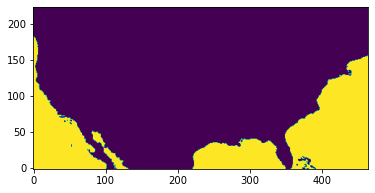

In [16]:
import matplotlib.pyplot as plt
plt.imshow((t_mean[0,:,:]!=t_mean_bc[0,:,:]),origin='lower')
plt.show()


In [129]:
hist[2]

array([ 0.77567869,  0.8295387 ,  0.8833987 ,  0.9372587 ,  0.99111871,
        1.04497871,  1.09883871,  1.15269871,  1.20655872,  1.26041872,
        1.31427872,  1.36813873,  1.42199873,  1.47585873,  1.52971874,
        1.58357874,  1.63743874,  1.69129874,  1.74515875,  1.79901875,
        1.85287875,  1.90673876,  1.96059876,  2.01445876,  2.06831877,
        2.12217877,  2.17603877,  2.22989877,  2.28375878,  2.33761878,
        2.39147878,  2.44533879,  2.49919879,  2.55305879,  2.60691879,
        2.6607788 ,  2.7146388 ,  2.7684988 ,  2.82235881,  2.87621881,
        2.93007881,  2.98393882,  3.03779882,  3.09165882,  3.14551882,
        3.19937883,  3.25323883,  3.30709883,  3.36095884,  3.41481884,
        3.46867884,  3.52253884,  3.57639885,  3.63025885,  3.68411885,
        3.73797886,  3.79183886,  3.84569886,  3.89955887,  3.95341887,
        4.00727887,  4.06113887,  4.11499888,  4.16885888,  4.22271888,
        4.27657889,  4.33043889,  4.38429889,  4.4381589 ,  4.49

In [112]:
hist[3]

In [80]:
np.nanmax(density)

NameError: name 'density' is not defined